In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from termcolor import colored
import matplotlib.pyplot as plt

images = pd.DataFrame()

data_path = r"data"
imaging_path = r"imaging"
filenames = os.listdir(os.path.join(data_path, imaging_path))
depths = pd.read_csv(os.path.join(data_path, "depths.csv"))

for i in filenames:
    img = cv2.imread(os.path.join(data_path, imaging_path, i), 0)
    try:
        depth = depths[depths["Filenames"].str.lower() == i.lower()][
            "Depth from lung surface (in micrometers) where image was acquired"
        ].values[0]
        # some files are named with SK658 and some with Sk658
    except IndexError:
        print(f"couldn't find depth for file {i}")
        continue
    images = pd.concat(
        [images, pd.DataFrame([{"filename": i, "image": img, "depth": depth}])],
        ignore_index=True,
    )
display(images.head())

couldn't find depth for file MASK_Sk658 Llobe ch010053.jpg


,filename,image,depth
0,MASK_SK658 Slobe ch010129.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3250
1,MASK_SK658 Slobe ch010115.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8800
2,MASK_SK658 Slobe ch010114.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9900
3,MASK_SK658 Slobe ch010060.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8400
4,MASK_SK658 Slobe ch010048.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",540


In [2]:
white_counts = []
black_counts = []
white_percents = []


for x in range(len(images)):
    _, binary = cv2.threshold(images.iloc[x]["image"], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(images)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filename

for x in range(len(images)):
    white_percent = 100 * (white_counts[x] / (black_counts[x] + white_counts[x]))
    white_percents.append(white_percent)

# print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(images)):
    print(colored(f"{images.iloc[x]['filename']}:", "red"))
    print(f"{white_percents[x]}% White | Depth: {images.iloc[x]['depth']} microns")
    print()

Counts of pixel by color in each image
White pixels in image 0: 82784
Black pixels in image 0: 4111520

White pixels in image 1: 151132
Black pixels in image 1: 4043172

White pixels in image 2: 242340
Black pixels in image 2: 3951964

White pixels in image 3: 142359
Black pixels in image 3: 4051945

White pixels in image 4: 49491
Black pixels in image 4: 4144813

White pixels in image 5: 369855
Black pixels in image 5: 3824449

White pixels in image 6: 56003
Black pixels in image 6: 4138301

White pixels in image 7: 193743
Black pixels in image 7: 4000561

White pixels in image 8: 99131
Black pixels in image 8: 4095173

White pixels in image 9: 120910
Black pixels in image 9: 4073394

White pixels in image 10: 139549
Black pixels in image 10: 4054755

White pixels in image 11: 383479
Black pixels in image 11: 3810825

White pixels in image 12: 119938
Black pixels in image 12: 4074366

White pixels in image 13: 100236
Black pixels in image 13: 4094068

White pixels in image 14: 97032
B

In [ ]:
"""Write your data to a .csv file"""

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame(
    {"Filenames": images["filename"], "Depths": images["depth"], "White percents": white_percents}
)

# Write that DataFrame to a .csv file

df.to_csv(os.path.join(data_path, "pct_white_pixels.csv"), index=False)

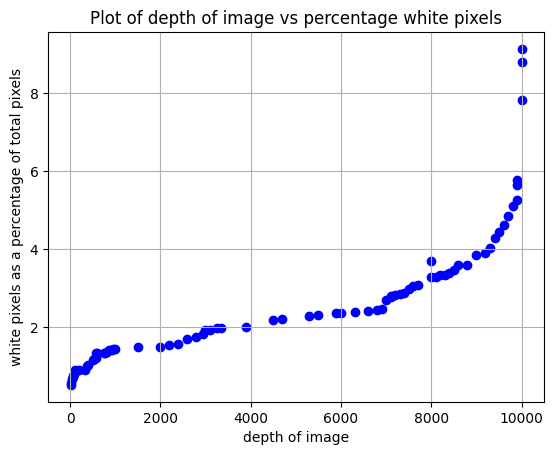

In [10]:
# display graph
plt.scatter(images["depth"], white_percents, marker="o", linestyle="-", color="blue")
plt.title("Plot of depth of image vs percentage white pixels")
plt.xlabel("depth of image")
plt.ylabel("white pixels as a percentage of total pixels")
plt.grid(True)